In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import scipy.stats
import random
%matplotlib inline

In [2]:
declarations_df = pd.read_csv('data/declarations.csv')
declarations_df.head()

,person_id,person_name,year,office_id,office_name,office_type_id,office_type_name,office_region_id,office_region_name,income_personal,income_relatives,savings,real_estate_amount,real_estate_squares
0,8,Зюганов Геннадий Андреевич,2009,14,Государственная Дума,7,"Федеральный, без региональной структуры",NaN,NaN,2075542.33,102279.19,0.00,3,448.7
1,8,Зюганов Геннадий Андреевич,2010,14,Государственная Дума,7,"Федеральный, без региональной структуры",NaN,NaN,2126487.00,0.00,3126451.00,1,167.4
2,8,Зюганов Геннадий Андреевич,2010,14,Государственная Дума,7,"Федеральный, без региональной структуры",NaN,NaN,2127686.49,168601.94,0.00,3,448.7
3,8,Зюганов Геннадий Андреевич,2010,449,Президент Российской Федерации,7,"Федеральный, без региональной структуры",NaN,NaN,7681748.38,349885.97,4343156.26,2,281.3
4,8,Зюганов Геннадий Андреевич,2011,14,Государственная Дума,7,"Федеральный, без региональной структуры",NaN,NaN,2177566.64,137656.24,0.00,3,448.7


In [3]:
df = pd.read_csv('data/graph.csv', header=None)
df.head()

/home/boris/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2
0,person1,person2,times_worked_together
1,8,8,1
2,8,9,11
3,8,10,10
4,8,11,7


In [4]:
person_names = declarations_df[['person_id', 'person_name']].drop_duplicates().reset_index(drop=True)
person_names.index = person_names.person_id
person_names = person_names.drop(['person_id'], axis=1)
person_names.head()

,person_name
person_id,
8,Зюганов Геннадий Андреевич
9,Алферов Жорес Иванович
10,Андреев Андрей Анатольевич
11,Апарина Алевтина Викторовна
12,Афонин Юрий Вячеславович


In [5]:
graph = nx.Graph()
threshold = 5
for v1, v2, weight in df.values:
    if weight >= threshold:
        graph.add_edge(v1, v2, weight=weight)

TypeError: '>=' not supported between instances of 'str' and 'int'

In [ ]:
graph = max(nx.connected_component_subgraphs(graph), key=len)
#nx.draw_networkx(graph)

In [ ]:
graph.order(), graph.size()

In [ ]:
officials_df = declarations_df[declarations_df.person_id.isin(graph.nodes)].groupby(['person_id'])['income', 'savings', 'real_estate_squares'].sum()
print(officials_df.shape)
officials_df.head()

In [ ]:
income = officials_df.income
savings = officials_df.savings
capital = officials_df.income + officials_df.savings
real_estate = officials_df.real_estate_squares


In [6]:
eigenvector_dict = nx.eigenvector_centrality_numpy(graph)
ec = np.array(list(eigenvector_dict.values()))
ec.shape

NetworkXPointlessConcept: cannot compute centrality for the null graph

In [26]:
income.shape

(620,)

In [27]:
print(scipy.stats.spearmanr(ec, income))
print(scipy.stats.spearmanr(ec, savings))
print(scipy.stats.spearmanr(ec, capital))
print(scipy.stats.spearmanr(ec, real_estate))

SpearmanrResult(correlation=0.03252011903591183, pvalue=0.4189039891201337)
SpearmanrResult(correlation=0.5437104642704628, pvalue=5.513323231489834e-49)
SpearmanrResult(correlation=0.054741352344518525, pvalue=0.1734129282970891)
SpearmanrResult(correlation=0.0916970177314603, pvalue=0.022404332913801804)


In [29]:
print(scipy.stats.pearsonr(ec, income))
print(scipy.stats.pearsonr(ec, savings))
print(scipy.stats.pearsonr(ec, capital))
print(scipy.stats.pearsonr(ec, real_estate))

(0.04176338127682036, 0.299151676387842)
(0.08326492482302476, 0.038200549709192254)
(0.05672860259635979, 0.15829870048339492)
(0.046753986347596324, 0.2450521806820174)


eigenvector_centrality
SpearmanrResult(correlation=0.03610544355831789, pvalue=0.36945392314655656)
SpearmanrResult(correlation=0.5467507781747826, pvalue=1.2761242597972046e-49)
SpearmanrResult(correlation=0.05822391252375265, pvalue=0.14759838884227158)
SpearmanrResult(correlation=0.09419710643486183, pvalue=0.01897742703514436)
degree_centrality
SpearmanrResult(correlation=0.04419587217625906, pvalue=0.27186206118104583)
SpearmanrResult(correlation=0.530681027658613, pvalue=2.4699382959436666e-46)
SpearmanrResult(correlation=0.06555946569994439, pvalue=0.10291603422649712)
SpearmanrResult(correlation=0.09559906613162195, pvalue=0.017263395645019712)
pagerank_numpy
SpearmanrResult(correlation=0.09044510491301008, pvalue=0.024313569024100083)
SpearmanrResult(correlation=0.2566561123756371, pvalue=8.770390672643522e-11)
SpearmanrResult(correlation=0.09884678957378465, pvalue=0.013803717652976128)
SpearmanrResult(correlation=0.09618801805562464, pvalue=0.016584751620767575)


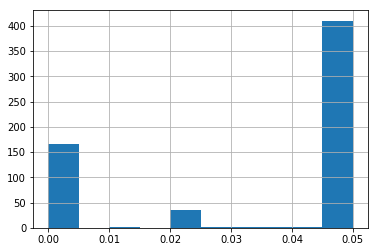

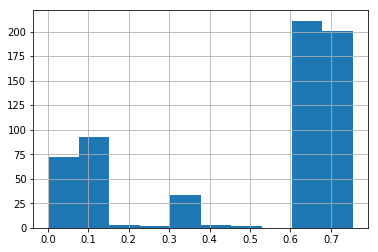

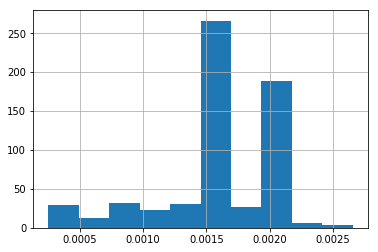

In [30]:
for centrality in [
    nx.eigenvector_centrality,
    nx.degree_centrality,
    nx.pagerank_numpy]:
    
    c_values = np.array(list(centrality(graph).values()))
    print(centrality.__name__)
    print(scipy.stats.spearmanr(c_values, income))
    print(scipy.stats.spearmanr(c_values, savings))
    print(scipy.stats.spearmanr(c_values, capital))
    print(scipy.stats.spearmanr(c_values, real_estate))
    
    pd.Series(c_values).hist()
    plt.show()

In [31]:

ec_series = pd.Series(eigenvector_dict)
ec_series.nlargest(10)

120    0.049979
194    0.049979
118    0.049979
198    0.049979
69     0.049942
162    0.049942
174    0.049942
13     0.049942
55     0.049942
87     0.049942
dtype: float64

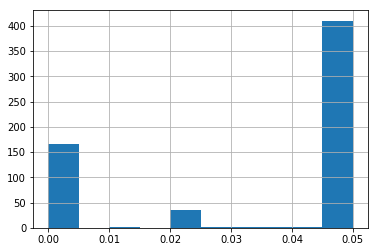

In [32]:
ec_series.hist()

In [33]:
top_officials = officials_df.ix[ec_series.index]
top_officials['ec'] = ec_series
top_officials['person_name'] = person_names.ix[top_officials.index]
top_officials.sort_values(by='ec', ascending=False)

/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,income,savings,real_estate_squares,ec,person_name
120,8.121657e+07,7.322309e+06,2.566140e+04,4.997892e-02,Балыхин Григорий Артёмович
194,1.366775e+09,1.326527e+07,1.015820e+04,4.997892e-02,Богуславский Ирек Борисович
118,5.254816e+08,3.879570e+07,3.664168e+05,4.997892e-02,Аршба Отари Ионович
198,5.950410e+08,6.574388e+07,7.159030e+04,4.997892e-02,Булавинов Вадим Евгеньевич
174,5.096157e+07,4.119944e+04,2.157200e+03,4.994150e-02,Герасименко Николай Федорович
69,3.320267e+07,3.491093e+06,4.265740e+04,4.994150e-02,Грешневиков Анатолий Николаевич
162,4.326798e+09,2.463586e+09,2.220705e+09,4.994150e-02,Резник Владислав Матусович
245,3.636709e+07,2.741813e+06,1.943976e+04,4.994150e-02,Заварзин Виктор Михайлович
251,1.248594e+09,1.919477e+07,2.561399e+04,4.994150e-02,Скоч Андрей Владимирович
91,3.148065e+07,1.752859e+05,1.927700e+03,4.994150e-02,Иванов Сергей Владимирович


In [34]:

c_dict = nx.pagerank_numpy(graph)
c_values = pd.Series(c_dict)
c_values.shape

(620,)

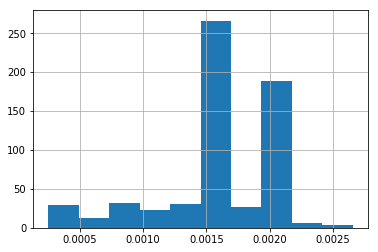

In [35]:
c_values.hist()

In [36]:
top_officials = officials_df.ix[c_values.index]
top_officials['centrality'] = c_values
top_officials['person_name'] = person_names.ix[top_officials.index]
top_officials = top_officials.sort_values(by='centrality', ascending=False)
top_officials

/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,income,savings,real_estate_squares,centrality,person_name
118,5.254816e+08,38795699.87,366416.75,0.002656,Аршба Отари Ионович
120,8.121657e+07,7322309.44,25661.40,0.002656,Балыхин Григорий Артёмович
194,1.366775e+09,13265268.00,10158.20,0.002656,Богуславский Ирек Борисович
198,5.950410e+08,65743883.00,71590.30,0.002656,Булавинов Вадим Евгеньевич
606,2.291176e+07,355809.00,696.60,0.002188,Аршинова Алёна Игоревна
607,3.525498e+07,102159.00,16058.40,0.002188,Аскендеров Заур Асевович
464,5.573281e+07,112687.00,8245.00,0.002188,Баталина Ольга Юрьевна
548,4.376280e+07,2033034.00,2851.80,0.002188,Баталова Рима Акбердиновна
436,4.630152e+07,0.00,44018.30,0.002188,Бариев Марат Мансурович
610,6.430591e+08,25613797.00,63117.84,0.002188,Брыксин Александр Юрьевич


/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


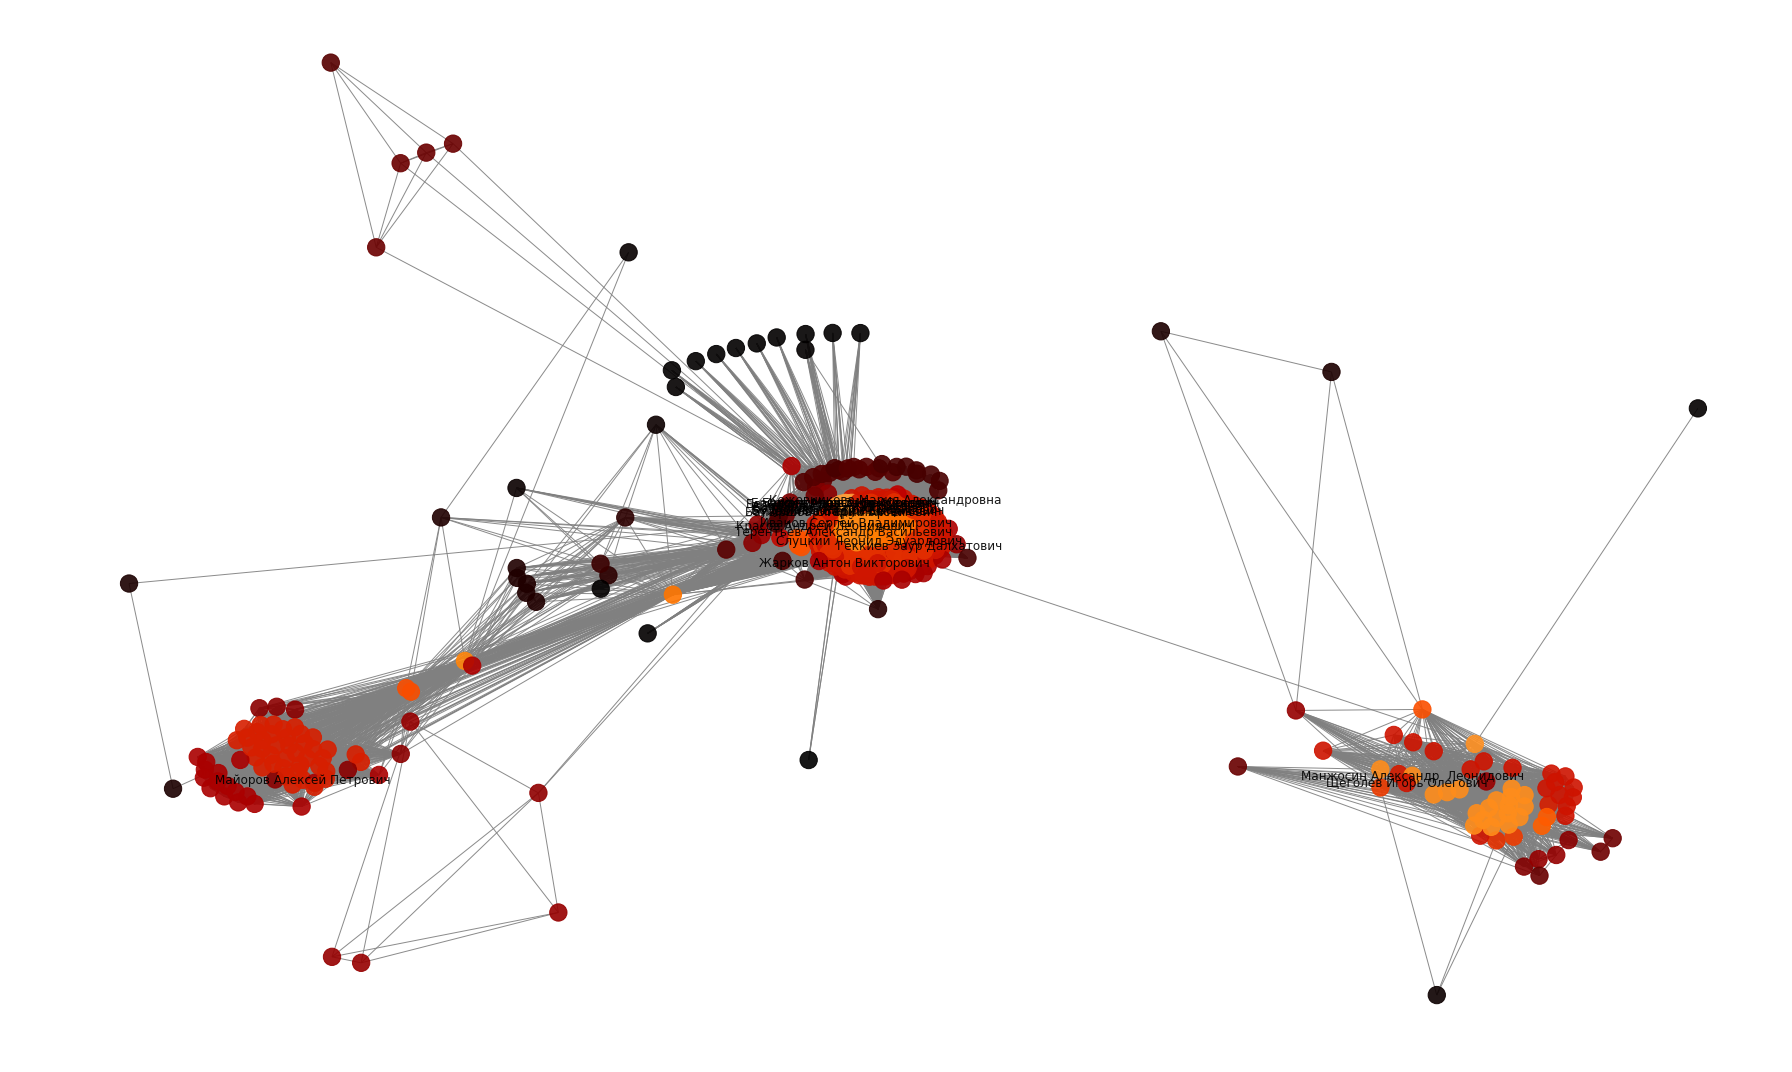

In [37]:
plt.figure(figsize=(25, 15))

pos = nx.spring_layout(graph, k=10/np.sqrt(graph.order()))


to_label = list(top_officials.head(10).index) + random.sample(list(top_officials.index), 10)
labels = top_officials.ix[to_label]['person_name'].to_dict()
colors = c_values
nodesize = c_values*2000

nx.draw_networkx(graph,
                 pos=pos,
                 node_color=colors,
                 nodesize=nodesize,
                 labels=labels,
                 edge_color='grey',
                 alpha=0.9,
                 cmap=plt.cm.gist_heat)
plt.axis('off')
plt.tight_layout()
plt.savefig('pagerank.jpg')
plt.show()

/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


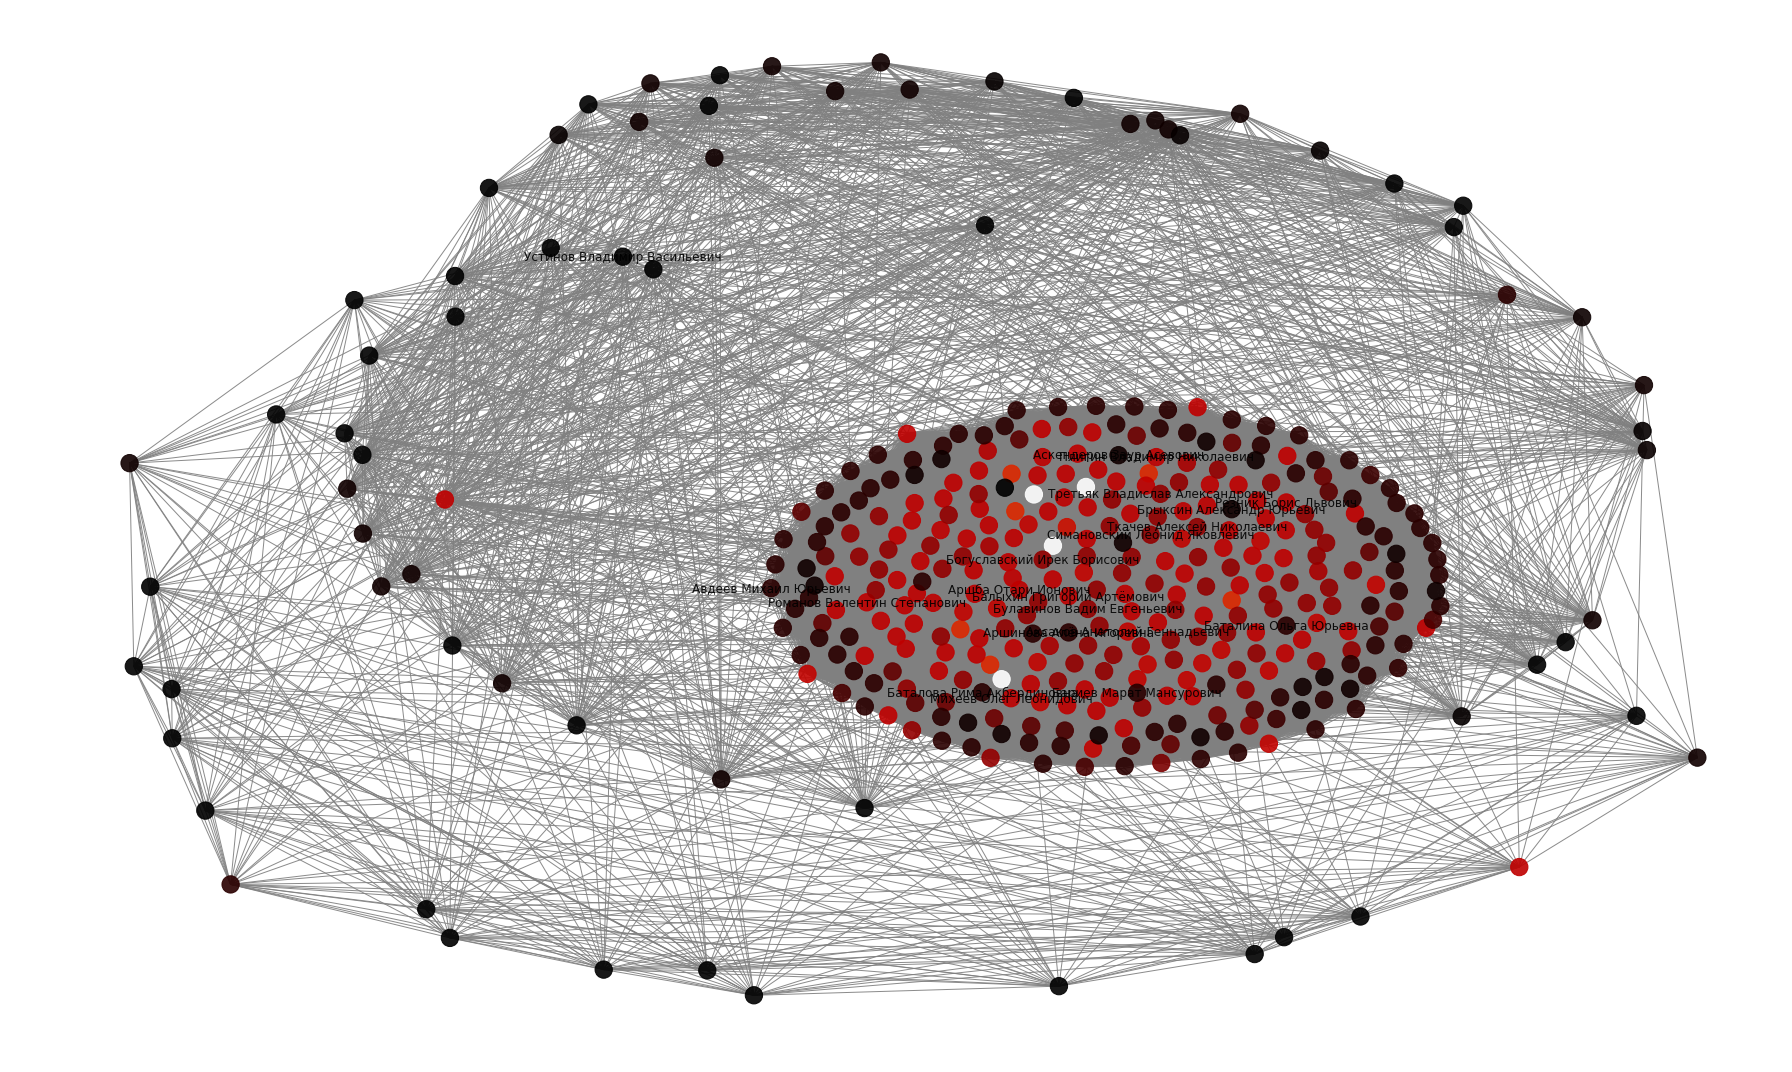

In [38]:
plt.figure(figsize=(25, 15))


draw_only = list(top_officials[top_officials.centrality > top_officials.centrality.quantile(0.25)].index)# list(top_officials.head(200).index)
subgraph = nx.subgraph(graph, draw_only)
colors = c_values.ix[draw_only]
nodesize = c_values.ix[draw_only]/c_values.ix[draw_only].max()*2000

to_label =draw_only[:10] + random.sample(draw_only, 10)
labels = top_officials.ix[to_label]['person_name'].to_dict()

pos = nx.spring_layout(subgraph, k=50/np.sqrt(graph.order()))

nx.draw_networkx(subgraph,
                 pos=pos,
                 node_color=colors,
                 nodesize=nodesize,
                 labels=labels,
                 edge_color='grey',
                 alpha=0.9,
                 cmap=plt.cm.gist_heat)
plt.axis('off')
plt.tight_layout()
plt.savefig('pagerank_cut.jpg')
plt.show()